## load logistic and lorenz logs

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [39]:
# fig = plt.figure(figsize=(20,3.5))
# ax = plt.gca()

def plot_ts(pred):
    y_true, y_pred =pred
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(y_true[:100,seq_id],'g')
    ax.set_ylim([-20,20])
    ax = fig.add_subplot(2, 4, i+1)
    ax.plot(y_pred[:100,seq_id], 'r')
    ax.set_ylim([-20,20])
    ax.set_title(model)

### load logs and print test error

In [38]:
exp='traffic'
time_stamp ="10-08-17-22-31-34"
models =["LSTM","MLSTM","TLSTM"] #'phased_lstm']#
hz_list= [16, 32, 64]
ts_list = [12,36, 84, 276]
lr_list =[3]



import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt



def read_config(fstream):
    d = {}
    for line in fstream:
        line.rstrip()
        tokens = line.split('\t')
        for token in tokens:
            try:
                key, val = token.split(":")
                d[key] = float(val)                
            except ValueError:
                'error prop'
    return d

def load_log(lr, ts, model):
    data_path = "/tmp/tensorRNN/log/"+exp+"/"+time_stamp+"/"+model+"/"+"lr-1e-"+ str(lr)+"/ts-"+ str(ts) +"/"
    f_pred= "predict.npy"
    f_err = "config.out"
    try:
        pred =  np.load(data_path+f_pred )
        with open(data_path+""+f_err,'r') as fstream:
            config = read_config(fstream)
        print(data_path)
        return config, pred
    except FileNotFoundError:
        return None, None

errs = np.ones((len(models), len(hz_list)))
i=0
for model in models:
    j=0
    for lr in lr_list:
        k=0
        for ts in ts_list:
            try:
                config, pred = load_log(lr, ts, model)
                print('train error:',config['train_error'],'test err:',config['test_error'])
                errs[i,j] =  config['test_error']
            except:
                pass
            k +=1
        j +=1
    i +=1


/tmp/tensorRNN/log/traffic/10-08-17-22-31-34/LSTM/lr-1e-3/ts-12/
train error: 0.0647732 test err: 0.0702164
/tmp/tensorRNN/log/traffic/10-08-17-22-31-34/LSTM/lr-1e-3/ts-36/
train error: 0.155588 test err: 0.152988
/tmp/tensorRNN/log/traffic/10-08-17-22-31-34/LSTM/lr-1e-3/ts-84/
train error: 0.123547 test err: 0.120307
/tmp/tensorRNN/log/traffic/10-08-17-22-31-34/MLSTM/lr-1e-3/ts-12/
train error: 0.0668581 test err: 0.0691809
/tmp/tensorRNN/log/traffic/10-08-17-22-31-34/MLSTM/lr-1e-3/ts-36/
train error: 0.0886787 test err: 0.0800566
/tmp/tensorRNN/log/traffic/10-08-17-22-31-34/MLSTM/lr-1e-3/ts-84/
train error: 0.12543 test err: 0.125637
/tmp/tensorRNN/log/traffic/10-08-17-22-31-34/MLSTM/lr-1e-3/ts-276/
train error: 0.0982523 test err: 0.104022
/tmp/tensorRNN/log/traffic/10-08-17-22-31-34/TLSTM/lr-1e-3/ts-12/
train error: 0.0599713 test err: 0.0698619
/tmp/tensorRNN/log/traffic/10-08-17-22-31-34/TLSTM/lr-1e-3/ts-36/
train error: 0.0689813 test err: 0.0795333
/tmp/tensorRNN/log/traffic/10

### load test prediction

rmse 0.104022536104


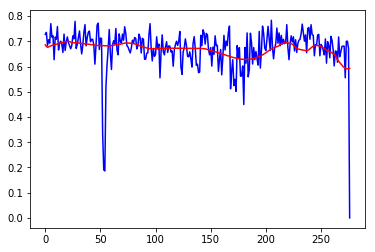

In [37]:
import numpy as np
import sklearn 
from sklearn.metrics import mean_squared_error


def RMSE(y_pred, y_true):
    """RMSE"""
    t1 = np.linalg.norm(y_pred-y_true)**2 / np.size(y_true)
    return np.sqrt(t1)

exp="traffic"
model="MLSTM"
ts="276"
data_path = "/tmp/tensorRNN/log/"+exp+"/"+time_stamp+"/"+model+"/"+"lr-1e-"+ str(lr)+"/ts-"+ str(ts) +"/"
true, pred = np.load(data_path+'predict.npy')

diff = (true-pred)**2
diff = diff.flatten()
mse = np.sum(diff)/diff.size
val = np.sqrt(mse)

print('rmse', val)

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

i=50
plt.plot(true[i,:,0],'b')
plt.plot(pred[i,:,0],'r-')